In [1]:
from fastai.vision.all import *
# path = Path('/root/Documents/images')
path = Path('/workspace/Notebooks/images')

In [2]:
(path).ls()

(#144) [Path('/workspace/Notebooks/images/Opsariichthys pachycephalus'),Path('/workspace/Notebooks/images/Nocomis biguttatus'),Path('/workspace/Notebooks/images/Rhinichthys obtusus'),Path('/workspace/Notebooks/images/Stegastes acapulcoensis'),Path('/workspace/Notebooks/images/Neopomacentrus cyanomos'),Path('/workspace/Notebooks/images/Lepomis macrochirus'),Path('/workspace/Notebooks/images/Chromis punctipinnis'),Path('/workspace/Notebooks/images/Rhinichthys osculus'),Path('/workspace/Notebooks/images/Abudefduf vaigiensis'),Path('/workspace/Notebooks/images/Pomacentrus bankanensis')...]

In [3]:
# df_path = Path('/root/Documents/')
df_path = Path('/workspace/Notebooks/')
df = pd.read_csv(df_path/"csv/families_3.csv")

In [4]:
set(df['Family'])

{'Centrarchidae', 'Cyprinidae', 'Pomacentridae'}

## Centrarchidae

In [5]:
df_centrarchidae = df[df['Family']=='Centrarchidae']
df_centrarchidae

,Order,Family,Subfamily,Genus,Specie,fname,is_valid
2,Perciformes,Centrarchidae,NaN,Micropterus,Micropterus dolomieu,Micropterus dolomieu/94521526.jpg,False
5,Perciformes,Centrarchidae,NaN,Lepomis,Lepomis macrochirus,Lepomis macrochirus/85507811.jpg,False
8,Perciformes,Centrarchidae,NaN,Pomoxis,Pomoxis nigromaculatus,Pomoxis nigromaculatus/35206285.jpg,False
10,Perciformes,Centrarchidae,NaN,Lepomis,Lepomis macrochirus,Lepomis macrochirus/28436924.jpg,False
11,Perciformes,Centrarchidae,NaN,Centrarchus,Centrarchus macropterus,Centrarchus macropterus/11041132.jpg,False
...,...,...,...,...,...,...,...
86376,Perciformes,Centrarchidae,NaN,Lepomis,Lepomis macrochirus,Lepomis macrochirus/50298992.jpg,True
86378,Perciformes,Centrarchidae,NaN,Lepomis,Lepomis macrochirus,Lepomis macrochirus/33140543.jpg,True
86379,Perciformes,Centrarchidae,NaN,Lepomis,Lepomis gibbosus,Lepomis gibbosus/43429084.jpg,True
86385,Perciformes,Centrarchidae,NaN,Micropterus,Micropterus salmoides,Micropterus salmoides/19167043.jpg,True


In [6]:
fishes = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 splitter=ColSplitter(),
                 get_x = ColReader(5, pref=path),
                 get_y=ColReader(4),
                 item_tfms=RandomResizedCrop(336, min_scale=0.5),
                 batch_tfms=aug_transforms())
dls = fishes.dataloaders(df_centrarchidae)

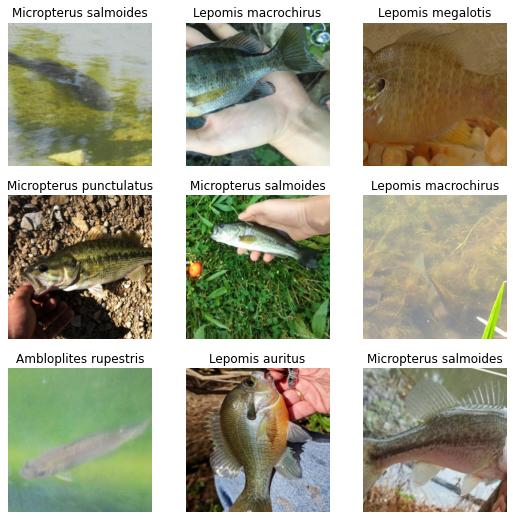

In [7]:
dls.show_batch(nrows=3, ncols=3)

In [8]:
fishes.summary(df_centrarchidae)

Setting-up type transforms pipelines
2      Perciformes  Centrarchidae       NaN  Micropterus   
5      Perciformes  Centrarchidae       NaN      Lepomis   
8      Perciformes  Centrarchidae       NaN      Pomoxis   
10     Perciformes  Centrarchidae       NaN      Lepomis   
11     Perciformes  Centrarchidae       NaN  Centrarchus   
...            ...            ...       ...          ...   
86376  Perciformes  Centrarchidae       NaN      Lepomis   
86378  Perciformes  Centrarchidae       NaN      Lepomis   
86379  Perciformes  Centrarchidae       NaN      Lepomis   
86385  Perciformes  Centrarchidae       NaN  Micropterus   
86386  Perciformes  Centrarchidae       NaN      Lepomis   

                        Specie                                 fname  is_valid  
2         Micropterus dolomieu     Micropterus dolomieu/94521526.jpg     False  
5          Lepomis macrochirus      Lepomis macrochirus/85507811.jpg     False  
8       Pomoxis nigromaculatus   Pomoxis nigromaculatus/352

### ResNet-34

In [15]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(1, 3e-3)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.012513,0.870826,0.269356,03:22


In [16]:
learn.unfreeze()

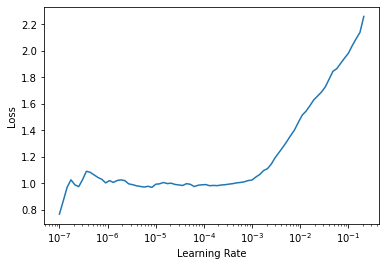

In [17]:
lr_min, lr_steep = learn.lr_find()

In [18]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 8.32e-07, steepest point: 7.59e-07


In [19]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.921378,0.812907,0.251529,03:25
1,0.803614,0.710255,0.219258,03:24
2,0.707669,0.652448,0.200130,03:24
3,0.609548,0.613120,0.186988,03:24
4,0.600590,0.604637,0.184645,03:23
5,0.594259,0.599850,0.183474,03:24


In [20]:
learn.export('family-centrarchidae-resnet34-6epochs.pkl')

### ResNet-50

In [21]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fit_one_cycle(1, 3e-3)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.875728,0.718319,0.222251,03:33


In [22]:
learn.unfreeze()

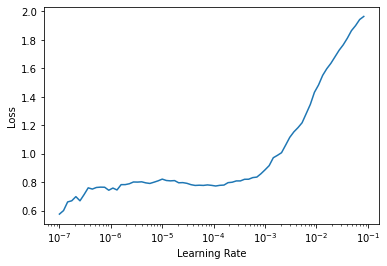

In [23]:
lr_min, lr_steep = learn.lr_find()

In [24]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 9.12e-08, steepest point: 7.59e-07


In [25]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.730563,0.660594,0.204815,04:21
1,0.643335,0.597924,0.184385,04:20
2,0.564133,0.548246,0.167339,04:21
3,0.500942,0.525211,0.160963,04:20
4,0.465716,0.516099,0.153676,04:21
5,0.462814,0.514744,0.155237,04:21


In [27]:
learn.export('family-centrarchidae-resnet50-6epochs.pkl')

In [28]:
learn.fit_one_cycle(3, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.471003,0.513236,0.155107,04:21
1,0.451821,0.494790,0.148211,04:20
2,0.402111,0.485762,0.145348,04:22


In [29]:
learn.export('family-centrarchidae-resnet50-9epochs.pkl')

In [30]:
learn.fit_one_cycle(3, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.376633,0.482286,0.144697,04:21
1,0.390666,0.474274,0.138712,04:21
2,0.338718,0.475029,0.140534,04:22


In [31]:
learn.export('family-centrarchidae-resnet50-12epochs.pkl')

In [8]:
learn = load_learner('weights/family-centrarchidae-resnet50-12epochs.pkl')
learn.dls = dls

In [10]:
learn.fit_one_cycle(3, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.361649,0.474688,0.143787,04:24
1,0.323777,0.471505,0.138191,04:21
2,0.294146,0.467021,0.137671,04:21


In [11]:
learn.export('family-centrarchidae-resnet50-15epochs.pkl')

In [12]:
learn.fit_one_cycle(3, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.299348,0.468686,0.136109,04:21
1,0.290669,0.455967,0.130514,04:21
2,0.259779,0.454824,0.130644,04:21


In [13]:
learn.export('family-centrarchidae-resnet50-18epochs.pkl')

In [14]:
learn.fit_one_cycle(3, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.248181,0.474202,0.132856,04:20
1,0.261866,0.453685,0.128692,04:20
2,0.233854,0.455086,0.130254,04:23


In [15]:
learn.export('family-centrarchidae-resnet50-21epochs.pkl')

In [16]:
learn.fit_one_cycle(3, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.229820,0.464719,0.130254,04:21
1,0.238017,0.456317,0.127001,04:22
2,0.184552,0.452057,0.126350,04:21


In [17]:
learn.export('family-centrarchidae-resnet50-24epochs.pkl')

## Cyprinidae

In [18]:
df_cyprinidae = df[df['Family']=='Cyprinidae']
df_cyprinidae

,Order,Family,Subfamily,Genus,Specie,fname,is_valid
0,Cypriniformes,Cyprinidae,Xenocyprinae,Hypophthalmichthys,Hypophthalmichthys molitrix,Hypophthalmichthys molitrix/35458230.jpg,False
3,Cypriniformes,Cyprinidae,Cyprininae,Cyprinus,Cyprinus carpio,Cyprinus carpio/89160603.jpg,False
6,Cypriniformes,Cyprinidae,Leuciscinae,Squalius,Squalius cephalus,Squalius cephalus/90664354.jpg,False
7,Cypriniformes,Cyprinidae,Leuciscinae,Pimephales,Pimephales vigilax,Pimephales vigilax/23093965.jpg,False
9,Cypriniformes,Cyprinidae,Cyprininae,Cyprinus,Cyprinus rubrofuscus,Cyprinus rubrofuscus/16307434.jpg,False
...,...,...,...,...,...,...,...
86374,Cypriniformes,Cyprinidae,Leuciscinae,Notropis,Notropis rubellus,Notropis rubellus/56841645.jpg,True
86375,Cypriniformes,Cyprinidae,Leuciscinae,Phoxinus,Phoxinus phoxinus,Phoxinus phoxinus/6907412.jpg,True
86382,Cypriniformes,Cyprinidae,Leuciscinae,Clinostomus,Clinostomus funduloides,Clinostomus funduloides/95620142.jpg,True
86383,Cypriniformes,Cyprinidae,Gobioninae,Pseudorasbora,Pseudorasbora parva,Pseudorasbora parva/65482784.jpg,True


In [19]:
fishes = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 splitter=ColSplitter(),
                 get_x = ColReader(5, pref=path),
                 get_y=ColReader(4),
                 item_tfms=RandomResizedCrop(336, min_scale=0.5),
                 batch_tfms=aug_transforms())
dls = fishes.dataloaders(df_cyprinidae)

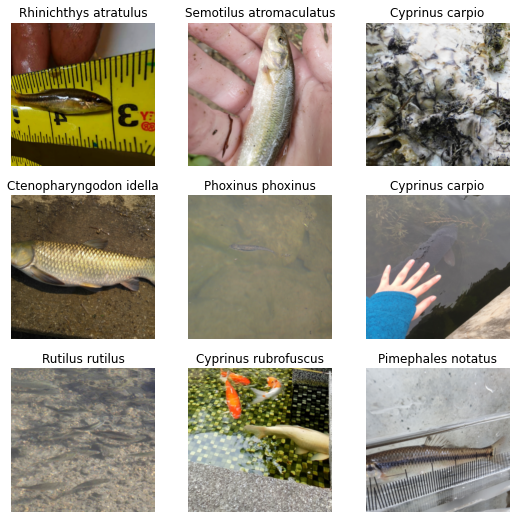

In [34]:
dls.show_batch(nrows=3, ncols=3)

In [35]:
fishes.summary(df_cyprinidae)

Setting-up type transforms pipelines
0      Cypriniformes  Cyprinidae   Xenocyprinae  Hypophthalmichthys   
3      Cypriniformes  Cyprinidae     Cyprininae            Cyprinus   
6      Cypriniformes  Cyprinidae    Leuciscinae            Squalius   
7      Cypriniformes  Cyprinidae    Leuciscinae          Pimephales   
9      Cypriniformes  Cyprinidae     Cyprininae            Cyprinus   
...              ...         ...            ...                 ...   
86374  Cypriniformes  Cyprinidae    Leuciscinae            Notropis   
86375  Cypriniformes  Cyprinidae    Leuciscinae            Phoxinus   
86382  Cypriniformes  Cyprinidae    Leuciscinae         Clinostomus   
86383  Cypriniformes  Cyprinidae     Gobioninae       Pseudorasbora   
86384  Cypriniformes  Cyprinidae  Ex-danioninae           Parazacco   

                            Specie                                     fname  \
0      Hypophthalmichthys molitrix  Hypophthalmichthys molitrix/35458230.jpg   
3                  Cy

### ResNet-34

In [36]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(1, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,2.112312,1.740263,0.480858,02:25


In [37]:
learn.unfreeze()

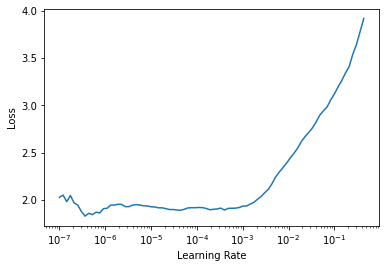

In [38]:
lr_min, lr_steep = learn.lr_find()

In [39]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 7.59e-08, steepest point: 2.29e-06


In [40]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,1.912026,1.684597,0.470223,02:25
1,1.744706,1.555839,0.442219,02:25
2,1.642202,1.450954,0.412620,02:25
3,1.524237,1.421718,0.400035,02:25
4,1.482101,1.391067,0.393832,02:24
5,1.460813,1.391057,0.394541,02:24


In [41]:
learn.export('family-cyprinidae-resnet34-6epochs.pkl')

### ResNet-50

In [42]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fit_one_cycle(1, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.867555,1.532020,0.429458,02:35


In [43]:
learn.unfreeze()

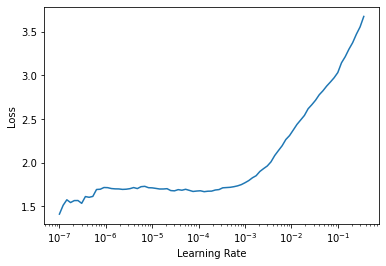

In [44]:
lr_min, lr_steep = learn.lr_find()

In [45]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.32e-05, steepest point: 2.09e-05


In [46]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,1.601711,1.467552,0.409961,03:11
1,1.488657,1.315569,0.376994,03:11
2,1.345039,1.237052,0.350585,03:11
3,1.259688,1.197119,0.340128,03:10
4,1.197819,1.168450,0.333215,03:11
5,1.143184,1.170785,0.333038,03:10


In [47]:
learn.export('family-cyprinidae-resnet50-6epochs.pkl')

In [48]:
learn.fit_one_cycle(3, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,1.138039,1.148461,0.330557,03:11
1,1.138968,1.111790,0.317086,03:11
2,1.021201,1.090694,0.309996,03:10


In [49]:
learn.export('family-cyprinidae-resnet50-9epochs.pkl')

In [50]:
learn.fit_one_cycle(3, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,1.054059,1.073867,0.308756,03:10
1,1.020153,1.063513,0.300603,03:11
2,0.951989,1.044173,0.297235,03:10


In [51]:
learn.export('family-cyprinidae-resnet50-12epochs.pkl')

In [20]:
learn = load_learner('weights/family-cyprinidae-resnet50-12epochs.pkl')
learn.dls = dls

In [21]:
learn.fit_one_cycle(3, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.910660,1.037652,0.295640,03:11
1,0.911549,1.002074,0.284828,03:11
2,0.846173,0.997432,0.277384,03:11


In [22]:
learn.export('family-cyprinidae-resnet50-15epochs.pkl')

In [23]:
learn.fit_one_cycle(3, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.845826,0.998504,0.279865,03:11
1,0.820543,0.969571,0.273839,03:11
2,0.787173,0.980273,0.277738,03:11


In [24]:
learn.export('family-cyprinidae-resnet50-18epochs.pkl')

In [25]:
learn.fit_one_cycle(3, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.782370,0.979770,0.272776,03:11
1,0.759150,0.956351,0.268522,03:11
2,0.686631,0.947884,0.268699,03:11


In [26]:
learn.export('family-cyprinidae-resnet50-21epochs.pkl')

In [27]:
learn.fit_one_cycle(3, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.696428,0.954744,0.269408,03:11
1,0.682110,0.938404,0.261787,03:11
2,0.646286,0.920220,0.257710,03:11


In [28]:
learn.export('family-cyprinidae-resnet50-24epochs.pkl')

## Pomacentridae

In [29]:
df_pomacentridae = df[df['Family']=='Pomacentridae']
df_pomacentridae

,Order,Family,Subfamily,Genus,Specie,fname,is_valid
1,Perciformes,Pomacentridae,Pomacentrinae,Dascyllus,Dascyllus trimaculatus,Dascyllus trimaculatus/13260279.jpg,False
4,Perciformes,Pomacentridae,Pomacentrinae,Abudefduf,Abudefduf sordidus,Abudefduf sordidus/41710167.jpg,False
12,Perciformes,Pomacentridae,Pomacentrinae,Pomacentrus,Pomacentrus coelestis,Pomacentrus coelestis/61062395.jpg,False
14,Perciformes,Pomacentridae,Pomacentrinae,Chromis,Chromis cyanea,Chromis cyanea/19228113.jpg,False
22,Perciformes,Pomacentridae,Pomacentrinae,Abudefduf,Abudefduf abdominalis,Abudefduf abdominalis/65032674.jpg,False
...,...,...,...,...,...,...,...
86371,Perciformes,Pomacentridae,Pomacentrinae,Abudefduf,Abudefduf sordidus,Abudefduf sordidus/29426558.jpg,True
86377,Perciformes,Pomacentridae,Pomacentrinae,Amblyglyphidodon,Amblyglyphidodon leucogaster,Amblyglyphidodon leucogaster/59090746.jpg,True
86380,Perciformes,Pomacentridae,Pomacentrinae,Abudefduf,Abudefduf sordidus,Abudefduf sordidus/57278261.jpg,True
86381,Perciformes,Pomacentridae,Pomacentrinae,Abudefduf,Abudefduf saxatilis,Abudefduf saxatilis/8770794.jpg,True


In [30]:
fishes = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 splitter=ColSplitter(),
                 get_x = ColReader(5, pref=path),
                 get_y=ColReader(4),
                 item_tfms=RandomResizedCrop(336, min_scale=0.5),
                 batch_tfms=aug_transforms())
dls = fishes.dataloaders(df_pomacentridae)

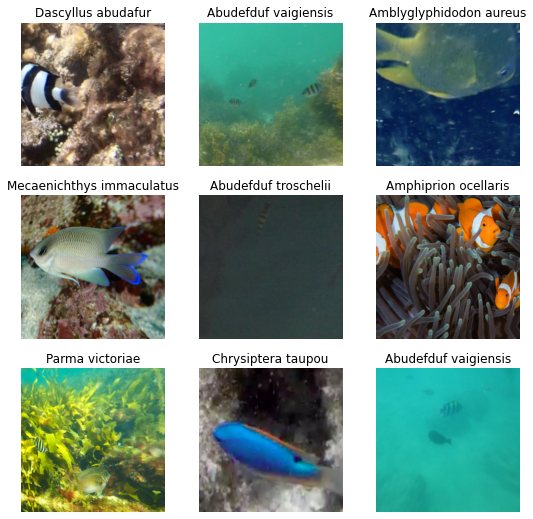

In [54]:
dls.show_batch(nrows=3, ncols=3)

In [55]:
fishes.summary(df_pomacentridae)

Setting-up type transforms pipelines
1      Perciformes  Pomacentridae  Pomacentrinae         Dascyllus   
4      Perciformes  Pomacentridae  Pomacentrinae         Abudefduf   
12     Perciformes  Pomacentridae  Pomacentrinae       Pomacentrus   
14     Perciformes  Pomacentridae  Pomacentrinae           Chromis   
22     Perciformes  Pomacentridae  Pomacentrinae         Abudefduf   
...            ...            ...            ...               ...   
86371  Perciformes  Pomacentridae  Pomacentrinae         Abudefduf   
86377  Perciformes  Pomacentridae  Pomacentrinae  Amblyglyphidodon   
86380  Perciformes  Pomacentridae  Pomacentrinae         Abudefduf   
86381  Perciformes  Pomacentridae  Pomacentrinae         Abudefduf   
86387  Perciformes  Pomacentridae  Pomacentrinae         Abudefduf   

                             Specie  \
1            Dascyllus trimaculatus   
4                Abudefduf sordidus   
12            Pomacentrus coelestis   
14                   Chromis cyanea 

### ResNet-34

In [56]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(1, 3e-3)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,2.019561,1.394813,0.390787,01:41


In [57]:
learn.unfreeze()

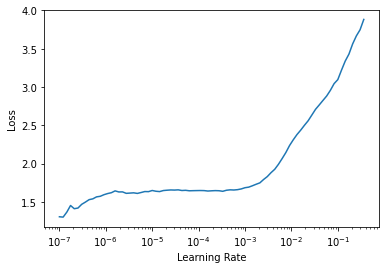

In [58]:
lr_min, lr_steep = learn.lr_find()

In [59]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 6.31e-08, steepest point: 2.29e-06


In [60]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,1.640766,1.322223,0.373576,01:41
1,1.488981,1.177135,0.335864,01:40
2,1.324617,1.083211,0.311314,01:40
3,1.234233,1.036199,0.297393,01:41
4,1.195900,1.016751,0.290306,01:40
5,1.172161,1.013984,0.291066,01:41


In [61]:
learn.export('family-pomacentridae-resnet34-6epochs.pkl')

### ResNet-50

In [62]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fit_one_cycle(1, 3e-3)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.707464,1.173827,0.335105,01:50


In [63]:
learn.unfreeze()

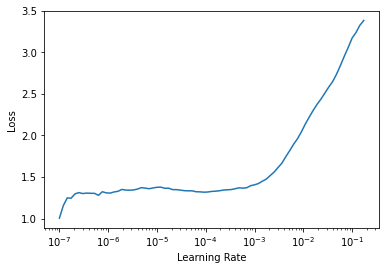

In [64]:
lr_min, lr_steep = learn.lr_find()

In [65]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 6.31e-08, steepest point: 1.74e-05


In [66]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,1.304672,1.085415,0.309542,02:13
1,1.219599,0.977140,0.277904,02:13
2,1.074045,0.908693,0.266515,02:13
3,0.977041,0.865463,0.253354,02:13
4,0.916976,0.850982,0.243989,02:13
5,0.889127,0.843601,0.242723,02:13


In [67]:
learn.export('family-pomacentridae-resnet50-6epochs.pkl')

In [68]:
learn.fit_one_cycle(3, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.879513,0.817965,0.238674,02:13
1,0.840921,0.794230,0.229815,02:13
2,0.813930,0.775068,0.228803,02:13


In [69]:
learn.export('family-pomacentridae-resnet50-9epochs.pkl')

In [70]:
learn.fit_one_cycle(3, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.769928,0.762001,0.225513,02:13
1,0.713315,0.731904,0.211339,02:13
2,0.697349,0.722454,0.209567,02:13


In [71]:
learn.export('family-pomacentridae-resnet50-12epochs.pkl')

In [31]:
learn = load_learner('weights/family-pomacentridae-resnet50-12epochs.pkl')
learn.dls = dls

In [32]:
learn.fit_one_cycle(3, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.676175,0.722754,0.212098,02:15
1,0.648340,0.693769,0.205264,02:14
2,0.596321,0.688387,0.203999,02:14


In [33]:
learn.export('family-pomacentridae-resnet50-15epochs.pkl')

In [34]:
learn.fit_one_cycle(3, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.611779,0.685265,0.206277,02:14
1,0.563924,0.665225,0.197165,02:14
2,0.513665,0.660722,0.193369,02:14


In [35]:
learn.export('family-pomacentridae-resnet50-18epochs.pkl')

In [36]:
learn.fit_one_cycle(3, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.533467,0.666044,0.197165,02:14
1,0.515217,0.644498,0.192103,02:14
2,0.472919,0.644664,0.188813,02:14


In [37]:
learn.export('family-pomacentridae-resnet50-21epochs.pkl')

In [38]:
learn.fit_one_cycle(3, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.495570,0.646682,0.195140,02:16
1,0.459084,0.629070,0.184763,02:15
2,0.416080,0.623100,0.184004,02:14


In [39]:
learn.export('family-pomacentridae-resnet50-24epochs.pkl')

# Test

In [5]:
from sklearn.metrics import accuracy_score

In [6]:
def get_pred(probs):
    return list(probs).index(max(probs))

In [7]:
weight_path = df_path/'weights'
# weight_path = df_path

In [8]:
def get_dls(is_y_specie=True, family=None):
    df = pd.read_csv(df_path/"csv/families_3.csv")
    y_idx = 4 if is_y_specie else 1
    fishes = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 splitter=ColSplitter(),
                 get_x = ColReader(5, pref=path),
                 get_y = ColReader(y_idx),
                 item_tfms=RandomResizedCrop(336, min_scale=0.5),
                 batch_tfms=aug_transforms())
    if family:
        df = df[df['Family']==family]
    dls = fishes.dataloaders(df)
    return dls


# def get_preds_DEPRECATED(pkl, is_y_specie=True, family=None, save_results=False):
#     dls = get_dls(is_y_specie, family)
#     learn = load_learner(weight_path/pkl, cpu=False)
#     probs, target, preds = learn.get_preds(dl=dls.valid, with_decoded=True)
# #     preds = [get_pred(p) for p in probs]
#     target_labels = get_labels(learn, target)
#     pred_labels = get_labels(learn, preds)
#     df_preds = pd.DataFrame.from_dict({'preds': pred_labels, 'target': target_labels, 'fname': dls.valid.items['fname']})
#     if save_results:
#         df_preds.to_csv(f"preds-{pkl.replace('.pkl', '.csv')}", index=False)
#     return df_preds


def predict_images(learn, path, images):
    preds = []
    for f in progress_bar(images):
        pred = learn.predict(path/f)[0]
        preds.append(pred)
    return preds

def get_preds(pkl, is_y_specie=True, family=None, save_results=False):
    dls = get_dls(is_y_specie, family)
    learn = load_learner(weight_path/pkl, cpu=False)
    preds = predict_images(learn, path, dls.valid.items['fname'])
    targets = dls.valid.items['Specie' if is_y_specie else 'Family']
    df_preds = pd.DataFrame.from_dict({'pred': preds, 'target': targets, 'fname': dls.valid.items['fname']})
    if save_results:
        df_preds.to_csv(f"csv/preds-{pkl.replace('.pkl', '.csv')}", index=False)
    return df_preds



def load_preds(pkl):
    df_preds = pd.read_csv(f"csv/preds-{pkl.replace('.pkl', '.csv')}")
    return df_preds

def get_labels(learn, values):
    return list(map(lambda e: learn.dls.vocab[e], values))

### Families

In [ ]:
df_families_preds = get_preds('families3-resnet50-24epochs.pkl', is_y_specie=False,
                              family=None, save_results=True)

In [12]:
df_families_preds = load_preds('families3-resnet50-12epochs.pkl')

print('Accuracy:', accuracy_score(df_families_preds['target'], df_families_preds['pred']))

df_families_preds

Accuracy: 0.9818266003009608


,pred,target,fname
0,Cyprinidae,Cyprinidae,Nocomis leptocephalus/82612049.jpg
1,Centrarchidae,Centrarchidae,Pomoxis annularis/75109954.jpg
2,Centrarchidae,Centrarchidae,Micropterus salmoides/92366868.jpg
3,Centrarchidae,Centrarchidae,Micropterus salmoides/10663572.jpg
4,Centrarchidae,Cyprinidae,Barbus barbus/47031884.jpg
...,...,...,...
17273,Cyprinidae,Cyprinidae,Pseudorasbora parva/65482784.jpg
17274,Cyprinidae,Cyprinidae,Parazacco spilurus/61744233.jpg
17275,Centrarchidae,Centrarchidae,Micropterus salmoides/19167043.jpg
17276,Centrarchidae,Centrarchidae,Lepomis macrochirus/24903221.jpg


In [51]:
df_families_preds = load_preds('families3-resnet50-24epochs.pkl')

print('Accuracy:', accuracy_score(df_families_preds['target'], df_families_preds['pred']))

Accuracy: 0.9829262646139599


### Centrarchidae

In [ ]:
df_centrarchidae_preds = get_preds('family-centrarchidae-resnet50-21epochs.pkl', is_y_specie=True,
                                   family='Centrarchidae', save_results=True)

In [13]:
df_centrarchidae_preds = load_preds('family-centrarchidae-resnet50-12epochs.pkl')

print('Accuracy:', accuracy_score(df_centrarchidae_preds['target'], df_centrarchidae_preds['pred']))

df_centrarchidae_preds

Accuracy: 0.8594664931685101


,pred,target,fname
0,Pomoxis annularis,Pomoxis annularis,Pomoxis annularis/75109954.jpg
1,Micropterus salmoides,Micropterus salmoides,Micropterus salmoides/92366868.jpg
2,Micropterus salmoides,Micropterus salmoides,Micropterus salmoides/10663572.jpg
3,Micropterus dolomieu,Micropterus dolomieu,Micropterus dolomieu/20015562.jpg
4,Lepomis cyanellus,Micropterus dolomieu,Micropterus dolomieu/48549221.jpg
...,...,...,...
7680,Lepomis macrochirus,Lepomis macrochirus,Lepomis macrochirus/50298992.jpg
7681,Lepomis macrochirus,Lepomis macrochirus,Lepomis macrochirus/33140543.jpg
7682,Lepomis gibbosus,Lepomis gibbosus,Lepomis gibbosus/43429084.jpg
7683,Micropterus salmoides,Micropterus salmoides,Micropterus salmoides/19167043.jpg


In [50]:
df_centrarchidae_preds = load_preds('family-centrarchidae-resnet50-21epochs.pkl')

print('Accuracy:', accuracy_score(df_centrarchidae_preds['target'], df_centrarchidae_preds['pred']))

Accuracy: 0.8697462589459987


### Cyprinidae

In [ ]:
df_cyprinidae_preds = get_preds('family-cyprinidae-resnet50-24epochs.pkl', is_y_specie=True,
                                family='Cyprinidae', save_results=True)

In [14]:
df_cyprinidae_preds = load_preds('family-cyprinidae-resnet50-12epochs.pkl')

print('Accuracy:', accuracy_score(df_cyprinidae_preds['target'], df_cyprinidae_preds['pred']))

df_cyprinidae_preds

Accuracy: 0.7027649769585254


,pred,target,fname
0,Nocomis leptocephalus,Nocomis leptocephalus,Nocomis leptocephalus/82612049.jpg
1,Pimephales promelas,Barbus barbus,Barbus barbus/47031884.jpg
2,Cyprinus carpio,Ctenopharyngodon idella,Ctenopharyngodon idella/31457209.jpg
3,Barbus barbus,Parazacco spilurus,Parazacco spilurus/16700647.jpg
4,Semotilus atromaculatus,Semotilus atromaculatus,Semotilus atromaculatus/20628680.jpg
...,...,...,...
5637,Notropis rubellus,Notropis rubellus,Notropis rubellus/56841645.jpg
5638,Phoxinus phoxinus,Phoxinus phoxinus,Phoxinus phoxinus/6907412.jpg
5639,Clinostomus funduloides,Clinostomus funduloides,Clinostomus funduloides/95620142.jpg
5640,Luxilus cornutus,Pseudorasbora parva,Pseudorasbora parva/65482784.jpg


In [49]:
df_cyprinidae_preds = load_preds('family-cyprinidae-resnet50-24epochs.pkl')

print('Accuracy:', accuracy_score(df_cyprinidae_preds['target'], df_cyprinidae_preds['pred']))

Accuracy: 0.7422899680964197


### Pomacentridae

In [ ]:
df_pomacentridae_preds = get_preds('family-pomacentridae-resnet50-24epochs.pkl', is_y_specie=True,
                                   family='Pomacentridae', save_results=True)

In [15]:
df_pomacentridae_preds = load_preds('family-pomacentridae-resnet50-12epochs.pkl')

print('Accuracy:', accuracy_score(df_pomacentridae_preds['target'], df_pomacentridae_preds['pred']))

df_pomacentridae_preds

Accuracy: 0.7904328018223234


,pred,target,fname
0,Abudefduf saxatilis,Abudefduf vaigiensis,Abudefduf vaigiensis/73380328.jpg
1,Stegastes acapulcoensis,Stegastes acapulcoensis,Stegastes acapulcoensis/73409623.jpg
2,Abudefduf vaigiensis,Abudefduf vaigiensis,Abudefduf vaigiensis/77279318.jpg
3,Abudefduf saxatilis,Abudefduf sordidus,Abudefduf sordidus/28563398.jpg
4,Abudefduf bengalensis,Abudefduf saxatilis,Abudefduf saxatilis/79959226.jpg
...,...,...,...
3946,Abudefduf sordidus,Abudefduf sordidus,Abudefduf sordidus/29426558.jpg
3947,Amblyglyphidodon leucogaster,Amblyglyphidodon leucogaster,Amblyglyphidodon leucogaster/59090746.jpg
3948,Abudefduf bengalensis,Abudefduf sordidus,Abudefduf sordidus/57278261.jpg
3949,Abudefduf saxatilis,Abudefduf saxatilis,Abudefduf saxatilis/8770794.jpg


In [48]:
df_pomacentridae_preds = load_preds('family-pomacentridae-resnet50-24epochs.pkl')

print('Accuracy:', accuracy_score(df_pomacentridae_preds['target'], df_pomacentridae_preds['pred']))

Accuracy: 0.8159959503923058


### All

In [52]:
df_preds = df_centrarchidae_preds.join(df_families_preds.set_index('fname'), rsuffix='_family', on='fname')
df_preds = df_preds.append(df_cyprinidae_preds.join(df_families_preds.set_index('fname'), rsuffix='_family', on='fname'))
df_preds = df_preds.append(df_pomacentridae_preds.join(df_families_preds.set_index('fname'), rsuffix='_family', on='fname'))
df_preds

,pred,target,fname,pred_family,target_family
0,Pomoxis annularis,Pomoxis annularis,Pomoxis annularis/75109954.jpg,Centrarchidae,Centrarchidae
1,Micropterus salmoides,Micropterus salmoides,Micropterus salmoides/92366868.jpg,Centrarchidae,Centrarchidae
2,Micropterus salmoides,Micropterus salmoides,Micropterus salmoides/10663572.jpg,Centrarchidae,Centrarchidae
3,Micropterus dolomieu,Micropterus dolomieu,Micropterus dolomieu/20015562.jpg,Centrarchidae,Centrarchidae
4,Micropterus dolomieu,Micropterus dolomieu,Micropterus dolomieu/48549221.jpg,Centrarchidae,Centrarchidae
...,...,...,...,...,...
3946,Abudefduf sordidus,Abudefduf sordidus,Abudefduf sordidus/29426558.jpg,Pomacentridae,Pomacentridae
3947,Amblyglyphidodon leucogaster,Amblyglyphidodon leucogaster,Amblyglyphidodon leucogaster/59090746.jpg,Pomacentridae,Pomacentridae
3948,Abudefduf sordidus,Abudefduf sordidus,Abudefduf sordidus/57278261.jpg,Pomacentridae,Pomacentridae
3949,Abudefduf saxatilis,Abudefduf saxatilis,Abudefduf saxatilis/8770794.jpg,Pomacentridae,Pomacentridae


In [53]:
ensemble_preds = []
for idx, row in df_preds.iterrows():
    if row['pred_family'] == row['target_family']:
        ensemble_preds.append(row['pred'])
    else:
        ensemble_preds.append('wrong_family')

In [18]:
accuracy_score(df_preds['target'], ensemble_preds), accuracy_score(df_preds['target'], df_preds['pred'])

(0.7834818844773701, 0.7925107072577845)

In [54]:
accuracy_score(df_preds['target'], ensemble_preds), accuracy_score(df_preds['target'], df_preds['pred'])

(0.8070378516031949, 0.8158351661071883)

### Species144

In [ ]:
df_species144_preds = get_preds('species144-resnet50-24epochs.pkl', is_y_specie=True,
                                save_results=True)

In [19]:
df_species144_preds = load_preds('species144-resnet50-12epochs.pkl')

print('Accuracy:', accuracy_score(df_species144_preds['target'], df_species144_preds['pred']))

df_species144_preds

Accuracy: 0.7785623336034263


,pred,target,fname
0,Nocomis leptocephalus,Nocomis leptocephalus,Nocomis leptocephalus/82612049.jpg
1,Pomoxis annularis,Pomoxis annularis,Pomoxis annularis/75109954.jpg
2,Micropterus salmoides,Micropterus salmoides,Micropterus salmoides/92366868.jpg
3,Micropterus salmoides,Micropterus salmoides,Micropterus salmoides/10663572.jpg
4,Lepomis macrochirus,Barbus barbus,Barbus barbus/47031884.jpg
...,...,...,...
17273,Luxilus cornutus,Pseudorasbora parva,Pseudorasbora parva/65482784.jpg
17274,Parazacco spilurus,Parazacco spilurus,Parazacco spilurus/61744233.jpg
17275,Micropterus salmoides,Micropterus salmoides,Micropterus salmoides/19167043.jpg
17276,Lepomis macrochirus,Lepomis macrochirus,Lepomis macrochirus/24903221.jpg


In [47]:
df_species144_preds = load_preds('species144-resnet50-24epochs.pkl')

print('Accuracy:', accuracy_score(df_species144_preds['target'], df_species144_preds['pred']))

Accuracy: 0.8108577381641394
